# Milestone 1

Name: Karina Maharani Utomo
<br>
Batch: 003
<br>
Hactiv8 Full Time Data Science

In this Milestone project, a supermarket dataset will be used. The original dataset can be accessed [here](https://www.kaggle.com/aungpyaeap/supermarket-sales)

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which was recorded in 3 different branches for 3 months data.

The objective of this project is to find out whether there is a significant difference between the amount of gross income the female and male customers contribute to the supermarket

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import kurtosis

%matplotlib inline

# Data Loading

In [2]:
# Loading and showing the data

data = pd.read_csv('supermarket_sales - Sheet1.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.shape

(1000, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# Checking whether the Invoice ID data are completely unique

data.shape[0] == len(data['Invoice ID'].unique())

True

In [6]:
# Checking for missing values

data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# Data Cleaning

In [8]:
# Changing the data type of Date

data['Date'] = data['Date'].astype('datetime64[ns]')

In [9]:
# Extracting the hour and day of the month of each purchase

data['Hour'] = pd.DatetimeIndex(data['Time']).hour
data['Day'] = pd.DatetimeIndex(data['Date']).day

In [10]:
# Showing the data after cleaning process

data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10,8


# Data Exploration

In [11]:
data.groupby(['Gender'])['Quantity'].sum()

Gender
Female    2869
Male      2641
Name: Quantity, dtype: int64

In [12]:
# Dividing the data based on gender of customers

data_female = data[data['Gender'] == 'Female']
data_male = data[data['Gender'] == 'Male']

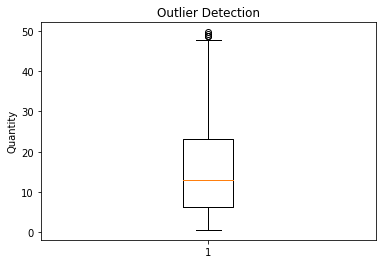

In [13]:
# Checking for outliers in the amount of products female customers have bought

plt.boxplot(data_female['gross income'], showfliers=True,)
plt.title('Outlier Detection')
plt.xlabel('')
plt.ylabel('Quantity')
plt.show()

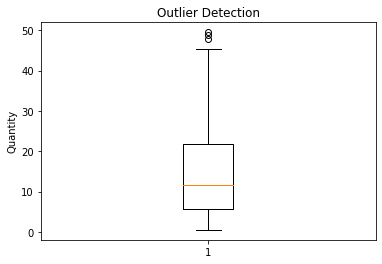

In [14]:
# Checking for outliers in the amount of products male customers have bought

plt.boxplot(data_male['gross income'], showfliers=True,)
plt.title('Outlier Detection')
plt.xlabel('')
plt.ylabel('Quantity')
plt.show()

**Removing the outliers**

In [15]:
female_gross = data_female['gross income']
male_gross = data_male['gross income']

In [16]:
female_out = female_gross.quantile(0.75)+1.5*(female_gross.quantile(0.75)-female_gross.quantile(0.25))
female_out

48.42700000000001

In [17]:
female_filt = data_female[data_female['gross income'] <= 48.42700000000001]
female_filt.shape

(496, 19)

check again the amount bought 

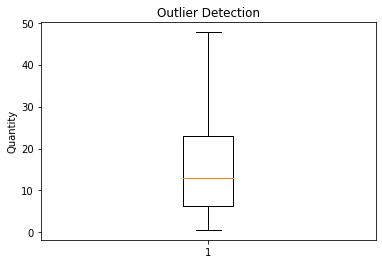

In [18]:
plt.boxplot(female_filt['gross income'], showfliers=True,)
plt.title('Outlier Detection')
plt.xlabel('')
plt.ylabel('Quantity')
plt.show()

In [19]:
male_out = male_gross.quantile(0.75)+1.5*(male_gross.quantile(0.75)-male_gross.quantile(0.25))
male_out

45.96025

In [20]:
male_filt = data_male[data_male['gross income'] <= 45.96025]
male_filt.shape

(496, 19)

In [39]:
male_filt['Quantity'].sum()

2611

In [40]:
female_filt['Quantity'].sum()

2819

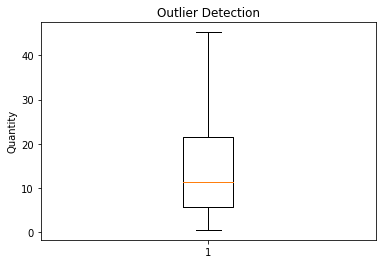

In [21]:
plt.boxplot(male_filt['gross income'], showfliers=True,)
plt.title('Outlier Detection')
plt.xlabel('')
plt.ylabel('Quantity')
plt.show()

# Measure of Central Tendency and Variance

In [22]:
# Calculating the measure of central tendency

print('The measure of central tendency for the gross income contributed by the female customers are as follows:')
print('Mean:', '%.2f' % female_filt['gross income'].mean())
print('Median:', female_filt['gross income'].median())
print('Mode:', female_filt['gross income'].mode())

print()

print('The measure of central tendency for the gross income contributed by the male customers are as follows:')
print('Mean:', '%.2f' % male_filt['gross income'].mean())
print('Median:', male_filt['gross income'].median())
print('Mode:', male_filt['gross income'].mode())

The measure of central tendency for the gross income contributed by the female customers are as follows:
Mean: 15.62
Median: 12.86175
Mode: 0     4.4640
1     9.0045
2    10.3260
3    10.3635
dtype: float64

The measure of central tendency for the gross income contributed by the male customers are as follows:
Mean: 14.59
Median: 11.349
Mode: 0     4.154
1     8.377
2    13.188
dtype: float64


In [23]:
# Calculating the measure of variance

print('The measure of variance for the gross income contributed by the female customers: are as follows:')
print('Range:', '%.2f' % (female_filt['gross income'].max() - female_filt['gross income'].min()))
print('Variance:', '%.2f' % female_filt['gross income'].var())
print('Standard Deviation:', '%.2f' % female_filt['gross income'].std())

print()

print('The measure of variance for the gross income contributed by the male customers: are as follows:')
print('Range:', '%.2f' % (male_filt['gross income'].max() - male_filt['gross income'].min()))
print('Variance:', '%.2f' % male_filt['gross income'].var())
print('Standard Deviation:', '%.2f' % male_filt['gross income'].std())

The measure of variance for the gross income contributed by the female customers: are as follows:
Range: 47.12
Variance: 131.26
Standard Deviation: 11.46

The measure of variance for the gross income contributed by the male customers: are as follows:
Range: 44.74
Variance: 126.63
Standard Deviation: 11.25


# Hypothesis Testing

There is quite a difference in the amount of products the female customers have bought (2,869) in comparison to the male customers (2,641). In this hypothesis testing, we are going to find out whether the difference in amount causes a significant difference between the gross income the female and male customers contribute to the supermarket

The method that will be used is two-tailed Independent two sample test, with a critical value of 5%. **The null and alternate hypotheses are as follows:**

$H_{0}$: There is no significant difference between the amount of gross income the female and male customers contribute to the supermarket
<br>
$H_{1}$: There is a significant difference between the amount of gross income the female and male customers contribute to the supermarket

The hypotheses can also be written as:
<br>
$H_{0}: \mu_{Female} = \mu_{Male}$
<br>
$H_{1}: \mu_{Female} \neq \mu_{Male}$

female sample mean:15.624062500000004
male sample mean:14.594584677419359
t-statistic:1.4277342357724296
p-value:0.15368382551586943


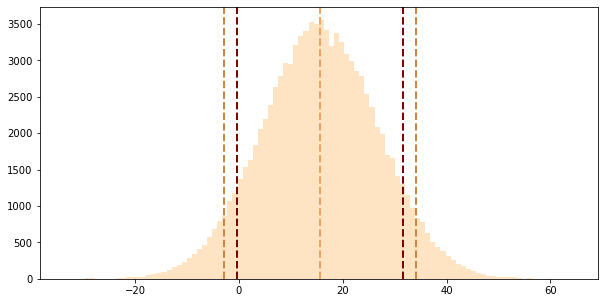

In [24]:
female = female_filt['gross income']
male = male_filt['gross income']

print("female sample mean:" + str(female.mean()))
print("male sample mean:" + str(male.mean()))

# Independent T-Test
t,p = stats.ttest_ind(female, male, equal_var=False)

print("t-statistic:" + str(t))
print("p-value:" + str(p))

pop = np.random.normal(female.mean(), male.std(), 100000)

# Calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, female.mean(), male.std())

plt.figure(figsize = (10,5))
plt.hist(pop, bins=100, color = 'bisque')

# Show the hypothesized population mean
plt.axvline(pop.mean(), color='sandybrown', linestyle='dashed', linewidth=2)

# Show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='peru', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='peru', linestyle='dashed', linewidth=2)

# Show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='maroon', linestyle='dashed', linewidth=2)
plt.axvline(pop.mean() - t*pop.std(), color='maroon', linestyle='dashed', linewidth=2)

plt.show()

female sample mean:15.956936127744514
male sample mean:14.7994869739479
t-statistic:1.5642197047338051
p-value:0.1180832056046586


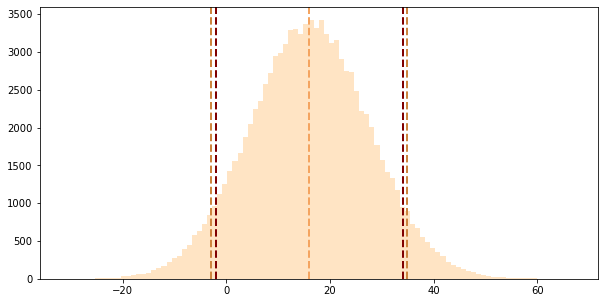

In [25]:
female = data_female['gross income']
male = data_male['gross income']

print("female sample mean:" + str(female.mean()))
print("male sample mean:" + str(male.mean()))

# Independent T-Test
t,p = stats.ttest_ind(female, male, equal_var=False)

print("t-statistic:" + str(t))
print("p-value:" + str(p))

pop = np.random.normal(female.mean(), male.std(), 100000)

# Calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, female.mean(), male.std())

plt.figure(figsize = (10,5))
plt.hist(pop, bins=100, color = 'bisque')

# Show the hypothesized population mean
plt.axvline(pop.mean(), color='sandybrown', linestyle='dashed', linewidth=2)

# Show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='peru', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='peru', linestyle='dashed', linewidth=2)

# Show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='maroon', linestyle='dashed', linewidth=2)
plt.axvline(pop.mean() - t*pop.std(), color='maroon', linestyle='dashed', linewidth=2)

plt.show()

# Conclusion

These are the values that are obtained from the indepentent t-test: 
1. Female sample mean of 15.624
2. Male sample mean of 14.594
3. T-statistic value of 1.428
4. P-value of 0.153

From the results, the obtained p-value (0.153) is greater than the critical value (0.05). This means, the null hypothesis ($H_{0}$) is accepted because there is not enough evidence to reject it. Meaning, even though the female customers buy more products than the male customers, **there is no significant difference between the amount of gross income the female and male customers contribute to the supermarket.**